# Import Packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
import matplotlib as mpl
matplotlib.font_manager.findSystemFonts()
import seaborn as sns
import datetime
import warnings

from cycler import cycler

# Adjust Plot Styles

In [2]:
# Adjust matplotlib's style using custom made style sheet
plt.style.use('presentation.mplstyle')

# highlight parts on graphs
facecolor = "whitesmoke" 

# plt.rcParams['font.family'] = 'Impact'

# Exploratory Data Analysis

In [3]:
# Load data
sales = pd.read_csv('data/business.retailsales.csv')
sales2 = pd.read_csv('data/business.retailsales2.csv')

In [4]:
# View data from business.retails.csv
# There are 1774 product entries with net quatity sold, gross sales, discounts and returns

# rename the columns to exlude spaces
sales.columns = sales.columns.str.replace(' ', '_')

# rename the product type values to exclude spaces
sales['Product_Type'] = sales['Product_Type'].str.strip()
sales

,Product_Type,Net_Quantity,Gross_Sales,Discounts,Returns,Total_Net_Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


## Data Distribution

### Histograms

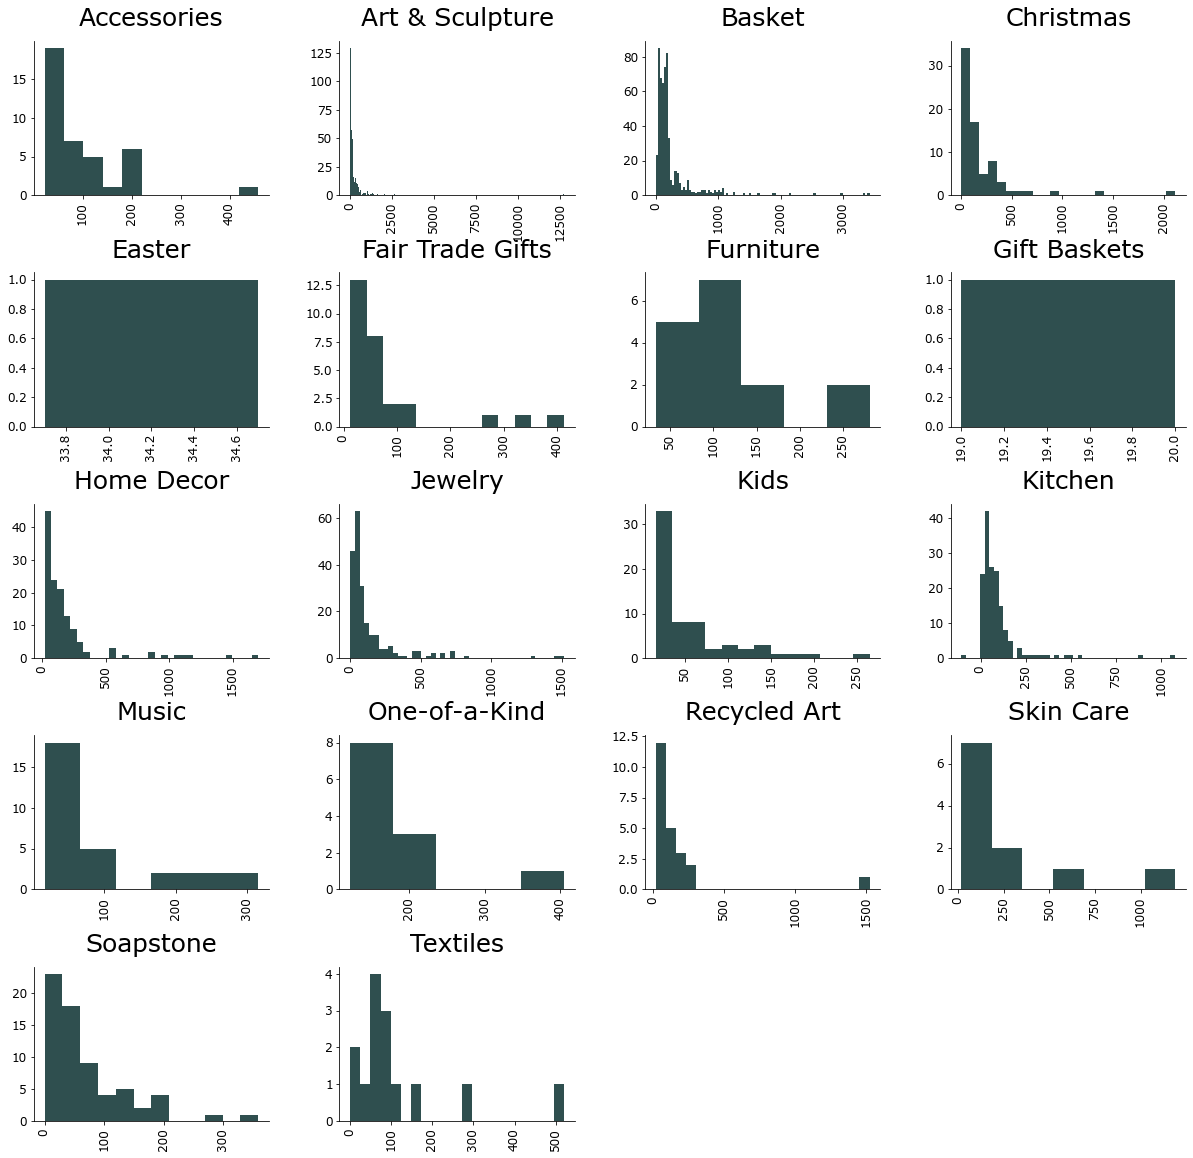

In [5]:
# plot histograms of total net sales for each product
plot = sales['Total_Net_Sales'].hist(by=sales['Product_Type'], bins='auto', grid=False, figsize=(20,20))

### Look at Easter and Gift Basket Data

In [6]:
# Check out Easter 
sales.loc[sales['Product_Type'] == 'Easter'] # only one entry

,Product_Type,Net_Quantity,Gross_Sales,Discounts,Returns,Total_Net_Sales
1482,Easter,1,38.0,-3.8,0.0,34.2


In [7]:
# Check out gift baskets
sales.loc[sales['Product_Type'] == 'Gift Baskets'] # only one entry

,Product_Type,Net_Quantity,Gross_Sales,Discounts,Returns,Total_Net_Sales
1690,Gift Baskets,1,19.5,0.0,0.0,19.5


## Table of Mean, SD, Min and Max

In [8]:
# create table 
total_sales = sales.groupby('Product_Type').agg([np.mean, np.std, np.min, np.max])

# Round all values
total_sales = total_sales.round()

# rearange columns so that total net sales is first
cols = total_sales.columns.tolist()
cols = cols[-5:] + cols[:-5]
total_sales = total_sales[cols]

# rearange rows from highest to lowest for total net sales
total_sales = total_sales.sort_values([('Total_Net_Sales','mean')], ascending=False)
total_sales

Returns Total_Net_Sales                        Net_Quantity  \
                    amax            mean    std   amin     amax         mean   
Product_Type                                                                   
Art & Sculpture      0.0           251.0  749.0   13.0  12732.0          4.0   
Basket               0.0           245.0  366.0    0.0   3427.0          3.0   
Skin Care            0.0           234.0  357.0   17.0   1189.0          9.0   
Christmas            0.0           198.0  313.0    0.0   2114.0          8.0   
Home Decor           0.0           196.0  275.0   18.0   1701.0          3.0   
One-of-a-Kind        0.0           176.0   79.0  122.0    405.0          1.0   
Recycled Art         0.0           161.0  305.0   21.0   1525.0          4.0   
Jewelry              0.0           141.0  217.0    0.0   1517.0          5.0   
Textiles             0.0           120.0  134.0    0.0    520.0          3.0   
Furniture            0.0           117.0   72.0   34.0    280.0          2.0   
Accessories          0.0            97.0   81.0   22.0    458.0          2.0   
Kitchen              0.0            95.0  136.0 -106.0   1078.0          5.0   
Music                0.0            83.0   89.0   16.0    315.0          3.0   
Fair Trade Gifts     0.0            79.0   98.0   12.0    412.0          4.0   
Soapstone            0.0            69.0   68.0    0.0    359.0          3.0   
Kids                 0.0            59.0   50.0   16.0    264.0          2.0   
Easter               0.0            34.0    NaN   34.0     34.0          1.0   
Gift Baskets         0.0            20.0    NaN   20.0     20.0          1.0   

                                 Gross_Sales                        Discounts  \
                   std amin amax        mean    std   amin     amax      mean   
Product_Type                                                                    
Art & Sculpture    7.0    1   59       268.0  866.0   13.0  14935.0      -9.0   
Basket             3.0    0   30       261.0  392.0   24.0   3825.0      -8.0   
Skin Care         12.0    1   32       237.0  364.0   18.0   1216.0      -3.0   
Christmas         13.0    0   90       212.0  323.0   18.0   2160.0      -5.0   
Home Decor         3.0    1   19       207.0  284.0   18.0   1748.0      -8.0   
One-of-a-Kind      0.0    1    1       182.0   90.0  125.0    450.0      -6.0   
Recycled Art       8.0    1   37       165.0  311.0   25.0   1554.0      -4.0   
Jewelry            9.0    0   96       148.0  230.0   12.0   1584.0      -5.0   
Textiles           2.0    0    8       135.0  147.0    1.0    564.0      -8.0   
Furniture          1.0    1    3       127.0   86.0   38.0    350.0     -11.0   
Accessories        4.0    1   25       100.0   84.0   22.0    472.0      -3.0   
Kitchen            8.0   -1   69       100.0  138.0    0.0   1104.0      -3.0   
Music              4.0    1   16        91.0   96.0   16.0    328.0      -3.0   
Fair Trade Gifts   6.0    1   22        81.0  101.0   12.0    432.0      -2.0   
Soapstone          3.0    0   13        72.0   69.0   12.0    359.0      -1.0   
Kids               2.0    1   12        61.0   51.0   16.0    264.0      -2.0   
Easter             NaN    1    1        38.0    NaN   38.0     38.0      -4.0   
Gift Baskets       NaN    1    1        20.0    NaN   20.0     20.0       0.0   

                                   Returns                
                   std   amin amax    mean   std    amin  
Product_Type                                              
Art & Sculpture   37.0 -594.0  0.0    -9.0  92.0 -1609.0  
Basket            20.0 -317.0  0.0    -8.0  37.0  -376.0  
Skin Care          8.0  -27.0  0.0     0.0   0.0     0.0  
Christmas          9.0  -46.0  0.0    -9.0  49.0  -380.0  
Home Decor        13.0  -74.0  0.0    -3.0  13.0   -68.0  
One-of-a-Kind     13.0  -45.0  0.0     0.0   0.0     0.0  
Recycled Art       7.0  -29.0  0.0     0.0   0.0     0.0  
Jewelry           10.0  -77.0  0.0    -2.0  

## Stacked Bar Chart of Net Sales, Discounts and Returns for all Products

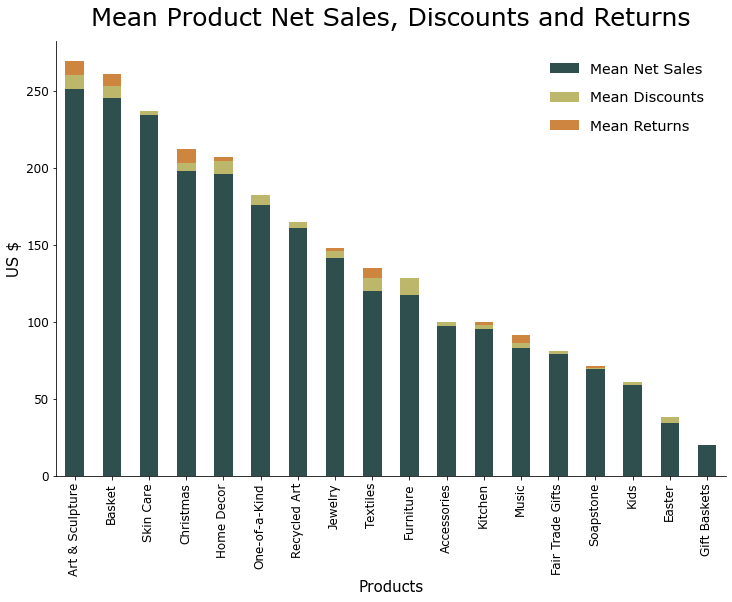

In [11]:
# get only the mean columns 
df = total_sales.iloc[:, total_sales.columns.get_level_values(1)=='mean'].copy(deep=True)

# collapse hierachical dataframe
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# make all values in table positive
df[['Discounts_mean', 'Returns_mean']] =  df.loc[:, ('Discounts_mean', 'Returns_mean')].abs()

# Remove Net quantity and gross sales
df.drop(df.columns[[1,2]], axis = 1, inplace=True)

# Stacked bar chart
df.plot(kind='bar', stacked=True)
plt.grid(False)

# labels
plt.title('Mean Product Net Sales, Discounts and Returns')
plt.xlabel('Products')
plt.ylabel('US $')

# legend
plt.legend(['Mean Net Sales','Mean Discounts','Mean Returns']);

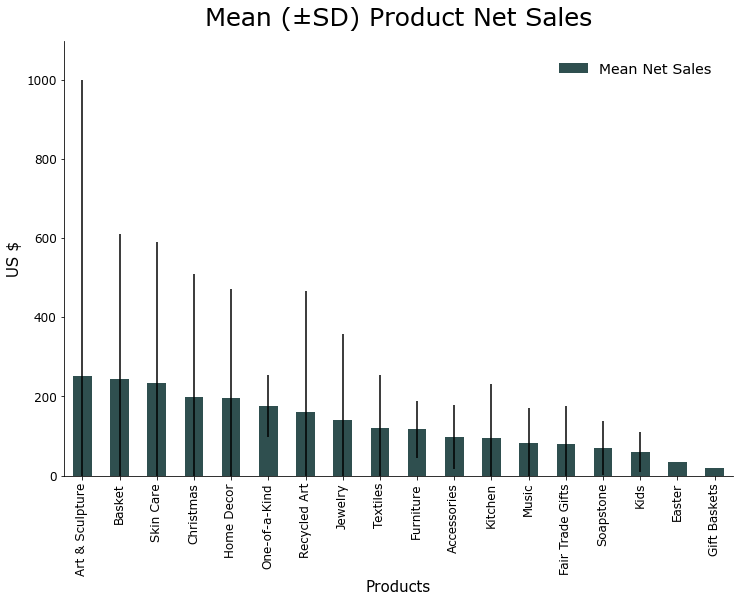

In [13]:
# get only the mean and standard deviation columns for total net sales
# collapse hierachical dataframe
df2 = total_sales.copy()
df2.columns = ['_'.join(col).strip() for col in df2.columns.values]

# Remove everything but net sales mean and net sales standard deviation
df2 = df2[['Total_Net_Sales_mean','Total_Net_Sales_std']]

# make product type into a data column instead of an index
df2.reset_index(inplace=True)

# plot standard deviation and mean of total net sales for each product
df2.plot.bar(x='Product_Type', y='Total_Net_Sales_mean', yerr='Total_Net_Sales_std')
plt.grid(False)
plt.ylim(0,1100)
error_kw=dict(lw=5, capsize=5, capthick=3)

# labels
plt.title('Mean (\u00B1SD) Product Net Sales')
plt.xlabel('Products')
plt.ylabel('US $')

# legend
plt.legend(['Mean Net Sales']);

In [14]:
# View data from business.retails2.csv
sales2
# There are 35 datapoints showing orders, gross sales, net sales, discounts and returns from Janury 2017 through to december 2019

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


### Line Graphs Time Series

In [15]:
# Create a column where month names are converted to integers
Date = []
for i in range(len(sales2['Month'])):
    Date.append(datetime.datetime.strptime(sales2['Month'][i], '%B').month)
sales2['month'] = Date


# Convert month and year columns to datetime
sales2['Date'] = pd.to_datetime(sales2[['Year','month']].assign(DAY=1))


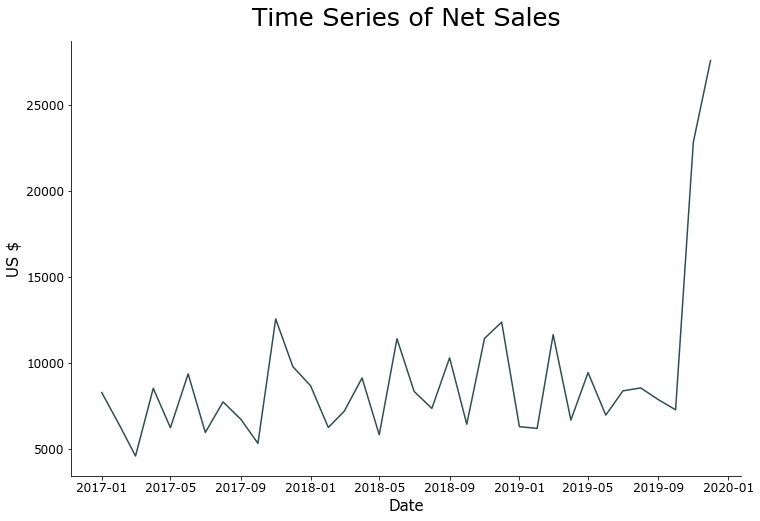

In [16]:
# Net Sales Time Series Plot
plt.plot(sales2['Date'], sales2['Net Sales'])
plt.grid(False)
plt.title('Time Series of Net Sales')
plt.xlabel('Date')
plt.ylabel('US $');

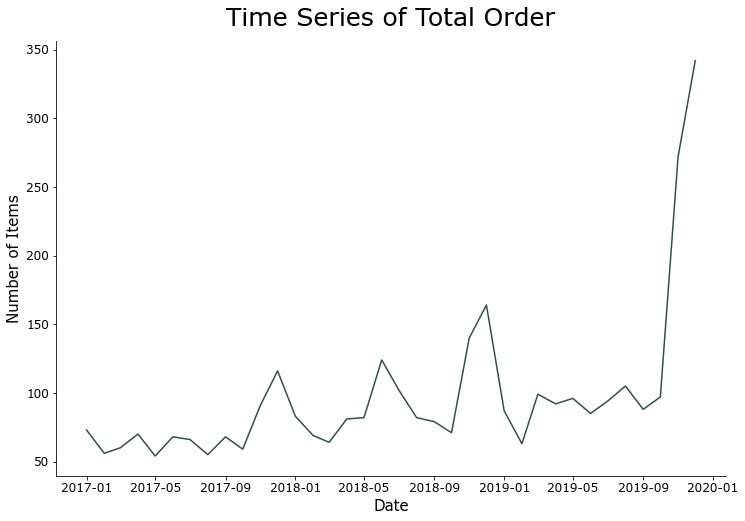

In [17]:
# Total Orders Time Series Plot
plt.plot(sales2['Date'], sales2['Total Orders'])
plt.title('Time Series of Total Order')
plt.xlabel('Date')
plt.ylabel('Number of Items');

## Time Series Stacked Bar Graph - Discounts, Returns, Net Sales

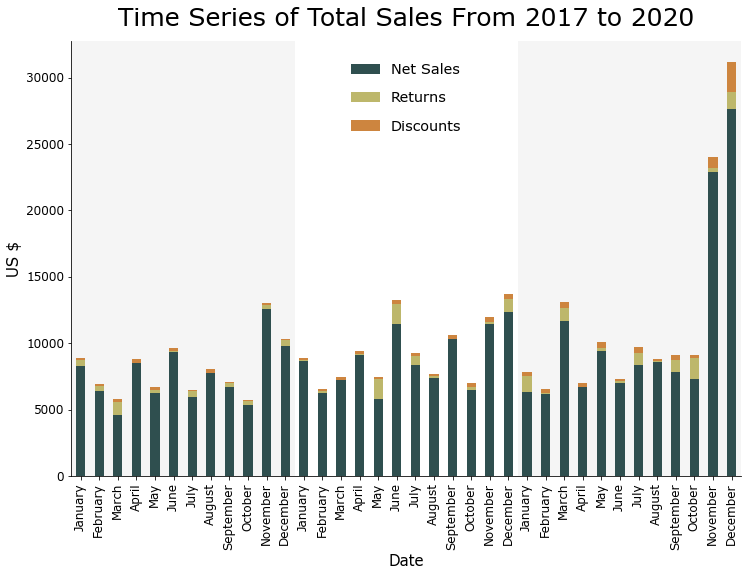

In [18]:
# Stacked bar chart
# Subset dataset to have only net sales, date, discounts and returns
df3 = sales2[['Date','Net Sales', 'Returns', 'Discounts']].copy()

# Make discounts and returns positive numbers
# df3[['Discounts', 'Returns']] = df3[['Discounts', 'Returns']].abs()
df3.loc[:, ('Discounts', 'Returns')] = df3[['Discounts', 'Returns']].abs()

# Set index as date
df3 = df3.set_index('Date')

# Fix X axis tick labels 
x_label = sales2['Month']
x = np.arange(len(x_label))

# Plot
df3.plot(kind='bar', stacked=True, zorder=4)

# Background
plt.axvspan(-1, 11.5, facecolor=facecolor)
plt.axvspan(23.5, 40, facecolor=facecolor)
plt.grid(False)

# labels
plt.title('Time Series of Total Sales From 2017 to 2020')
plt.xticks(ticks = x, labels = x_label)
plt.xlabel('Date')
plt.ylabel('US $');

In [50]:
# Make stacked bar graph for net sales, returns and discounts per year

# create a table 
variables = ['Total Orders', 'Gross Sales', 'Shipping', 'Year', 'Discounts', 'Returns', 'Total Sales']
total_sales3 = sales2[variables].groupby('Year').agg([np.mean, np.std, np.min, np.max])

total_sales3 = total_sales3.round()

# rearange columns so that total net sales is first
cols = total_sales3.columns.tolist()
cols = cols[-4:] + cols[:-4]
total_sales3 = total_sales3[cols]

# rearange rows from highest to lowest for total net sales
total_sales3 = total_sales3.sort_values([('Total Sales','mean')], ascending=True)
total_sales3

Total Sales                          Total Orders                  \
            mean     std    amin     amax         mean   std amin amax   
Year                                                                     
2017      8625.0  2491.0  5297.0  14125.0         70.0  18.0   54  116   
2018     10297.0  2686.0  7060.0  14936.0         95.0  31.0   64  164   
2019     12992.0  8449.0  7318.0  33306.0        127.0  86.0   63  342   

     Gross Sales          ... Shipping         Discounts                 \
            mean     std  ...     amin    amax      mean    std    amin   
Year                      ...                                             
2017      8112.0  2152.0  ...    695.0  1555.0    -154.0   75.0  -281.0   
2018      9443.0  2448.0  ...    909.0  2552.0    -259.0   81.0  -414.0   
2019     11980.0  7647.0  ...   1122.0  5703.0    -521.0  573.0 -2270.0   

            Returns                       
       amax    mean    std    amin  amax  
Year                                      
2017  -52.0  -331.0  274.0 -1017.0   0.0  
2018 -141.0  -451.0  558.0 -1507.0   0.0  
2019 -186.0  -643.0  565.0 -1573.0 -10.0  

[3 rows x 24 columns]

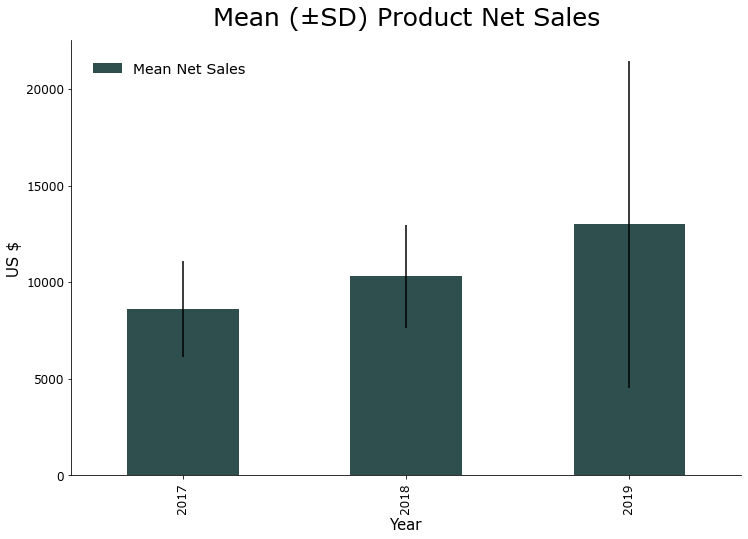

In [63]:
# get only the mean and standard deviation columns for total net sales
# collapse hierachical dataframe
df6 = total_sales3.copy()
df6.columns = ['_'.join(col).strip() for col in df6.columns.values]

# Remove everything but net sales mean and net sales standard deviation
df6 = df6[['Total Sales_mean','Total Sales_std']]

# make product type into a data column instead of an index
df6.reset_index(inplace=True)

# plot standard deviation and mean of total net sales for each product
df6.plot.bar(x='Year', y='Total Sales_mean', yerr='Total Sales_std')
plt.grid(False)
# plt.ylim(0,1100)
error_kw=dict(lw=5, capsize=5, capthick=3)

# labels
plt.title('Mean (\u00B1SD) Product Net Sales')
plt.xlabel('Year')
plt.ylabel('US $')

# legend
plt.legend(['Mean Net Sales'], loc = 'upper left');

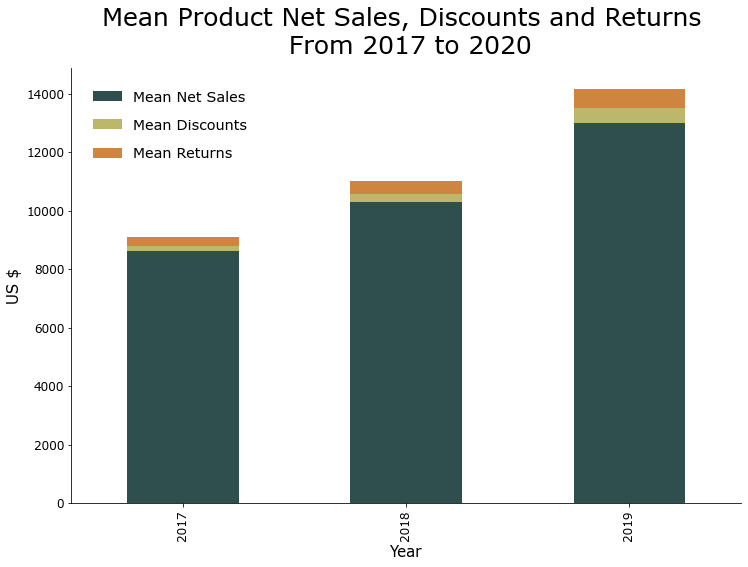

In [53]:
# get only the mean columns 
df5 = total_sales3.iloc[:, total_sales3.columns.get_level_values(1)=='mean'].copy(deep=True)

# collapse hierachical dataframe
df5.columns = ['_'.join(col).strip() for col in df5.columns.values]

# make all values in table positive
df5[['Discounts_mean', 'Returns_mean']] =  df5.loc[:, ('Discounts_mean', 'Returns_mean')].abs()

# Remove Net quantity and gross sales
df5.drop(df5.columns[[1,2,3]], axis = 1, inplace=True)

# Stacked bar chart
df5.plot(kind='bar', stacked=True)
plt.grid(False)

# labels
plt.title('Mean Product Net Sales, Discounts and Returns \n From 2017 to 2020')
plt.xlabel('Year')
plt.ylabel('US $')

# legend
plt.legend(['Mean Net Sales','Mean Discounts','Mean Returns']);

In [31]:
# create table 
variables = ['Total Orders', 'Gross Sales', 'Shipping', 'Month', 'Discounts', 'Returns', 'Total Sales']
total_sales2 = sales2[variables].groupby('Month').agg([np.mean, np.std, np.min, np.max])

# Round all values
total_sales2 = total_sales2.round()

# rearange columns so that total net sales is first
cols = total_sales2.columns.tolist()
cols = cols[-4:] + cols[:-4]
total_sales2 = total_sales2[cols]

# # rearange rows from highest to lowest for total net sales
total_sales2 = total_sales2.sort_values([('Total Sales','mean')], ascending=False)
total_sales2

Total Sales                            Total Orders              \
                 mean      std     amin     amax         mean    std amin   
Month                                                                       
December      19792.0  11858.0  11133.0  33306.0        207.0  119.0  116   
November      18492.0   7961.0  13671.0  27681.0        168.0   94.0   91   
June          10815.0   2616.0   8327.0  13543.0         92.0   29.0   68   
September      9673.0   2160.0   7640.0  11941.0         78.0   10.0   68   
April          9382.0   1263.0   8024.0  10522.0         81.0   11.0   70   
August         9209.0    931.0   8584.0  10278.0         81.0   25.0   55   
March          9167.0   4284.0   5297.0  13770.0         74.0   21.0   60   
January        8949.0   1180.0   7616.0   9860.0         81.0    7.0   73   
July           8919.0   1864.0   6767.0  10015.0         87.0   19.0   66   
May            8460.0   2387.0   7060.0  11216.0         77.0   21.0   54   
October        7546.0   1451.0   6022.0   8912.0         76.0   19.0   59   
February       7252.0     83.0   7159.0   7318.0         63.0    7.0   56   

               Gross Sales           ... Shipping         Discounts          \
          amax        mean      std  ...     amin    amax      mean     std   
Month                                ...                                      
December   342     18408.0  11189.0  ...   1341.0  5703.0    -930.0  1165.0   
November   272     16342.0   6650.0  ...   1555.0  4825.0    -441.0   324.0   
June       124     10068.0   2995.0  ...   1204.0  2124.0    -252.0    76.0   
September   88      8912.0   1760.0  ...    907.0  1634.0    -231.0   152.0   
April       92      8399.0   1267.0  ...   1068.0  1388.0    -266.0    30.0   
August     105      8188.0    588.0  ...    843.0  1725.0    -200.0    59.0   
March       99      8766.0   3824.0  ...    707.0  2115.0    -280.0   141.0   
January     87      8532.0    625.0  ...   1088.0  1314.0    -203.0    67.0   
July       102      8498.0   1763.0  ...    807.0  1631.0    -245.0   198.0   
May         96      8084.0   1778.0  ...    866.0  1768.0    -289.0   150.0   
October     97      7289.0   1723.0  ...    695.0  1631.0    -215.0   110.0   
February    69      6654.0    221.0  ...    892.0  1122.0    -185.0    94.0   

                         Returns                        
             amin   amax    mean    std    amin   amax  
Month                                                   
December  -2270.0 -150.0  -885.0  450.0 -1311.0 -414.0  
November   -777.0 -131.0  -281.0  111.0  -365.0 -154.0  
June       -335.0 -186.0  -563.0  820.0 -1507.0  -18.0  
September  -355.0  -62.0  -378.0  435.0  -853.0    0.0  
April      -285.0 -232.0   -17.0   21.0   -40.0    0.0  
August     -259.0 -141.0  -103.0   87.0  -197.0  -26.0  
March      -440.0 -172.0  -669.0  572.0 -1017.0   -9.0  
January    -262.0 -129.0  -575.0  622.0 -1250.0  -26.0  
July       -447.0  -52.0  -689.0  220.0  -909.0 -469.0  
May        -461.0 -186.0  -625.0  714.0 -1448.0 -173.0  
October    -279.0  -88.0  -724.0  735.0 -1573.0 -295.0  
February   -289.0 -105.0  -191.0  199.0  -416.0  -39.0  

[12 rows x 24 columns]

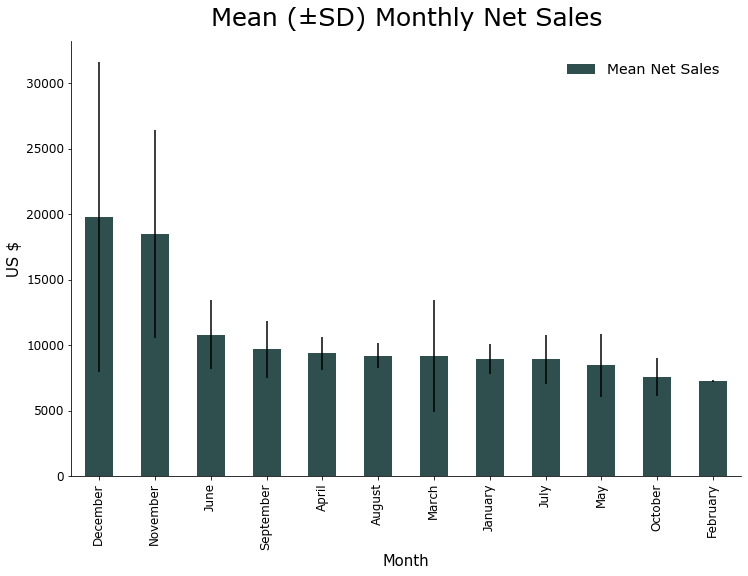

In [33]:
# get only the mean and standard deviation columns for total net sales
# collapse hierachical dataframe
df4 = total_sales2.copy()
df4.columns = ['_'.join(col).strip() for col in df4.columns.values]

# Remove everything but net sales mean and net sales standard deviation
df4 = df4[['Total Sales_mean','Total Sales_std']]

# make product type into a data column instead of an index
df4.reset_index(inplace=True)

# plot standard deviation and mean of total net sales for each product
df4.plot.bar(x='Month', y='Total Sales_mean', yerr='Total Sales_std')
plt.grid(False)
# plt.ylim(0,1100)
error_kw=dict(lw=5, capsize=5, capthick=3)

# labels
plt.title('Mean (\u00B1SD) Monthly Net Sales')
plt.xlabel('Month')
plt.ylabel('US $')

# legend
plt.legend(['Mean Net Sales']);

In [ ]:
# get only the mean and standard deviation columns for total net sales over the three years


# Projections for Q4 of 2020 (oct-dec)

## List of sales per item for Q4